# Milestone-1a

Nama: Wenny

Batch: 15

Dataset:https://www.kaggle.com/datasets/surajjha101/top-youtube-channels-data

Dashboard: https://datastudio.google.com/reporting/0a7cca00-416e-4004-b092-11be0b8bbada

Fungsi dari Google Data Studio: https://support.google.com/datastudio/table/6379764?hl=en

## Problem Identification

**Topic:** Popularity, Youtube, Viewers, Upload Videos, Channel Years, Video Categories, 2022 

**Background:**

  Seorang politikus Tuan Iskandar, ingin mendapatkan simpatik rakyat melalui media sosial youtube.
  Asistennya mendatangi kantor Data Scientist tempat Anda bekerja dan meminta Anda melakukan penelitian terhadap metrik-metrik yang mempengaruhi popularitas seseorang di youtube di tahun 2022.

**Problem Statement:**

Memberikan rekomendasi konten-konten yang dapat menaikkan engagement untuk pembuatan channel baru di Youtube pada tahun 2022.

**Yang akan diulik:** (4 visualisasi), (1 statistik deskriptiv), (1 statistik inferensia)
- Siapa youtuber dengan most viewed video terbanyak di youtube?
- Bagaimana hubungan antara jumlah subscribe channel dengan most viewed video di youtube?
- Bagaimana hubungan antara kategori video dengan most viewed video di youtube? 
- Bagaimana hubungan antara tahun pembuatan channel dengan most viewed video di youtube?
- Bagaimana hubungan antara total upload video dengan most viewed video di youtube? 




## Start Working

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
# from google.colab import files untuk menyimpan csv dari colab ke lokal

## I. Data Loading

Melakukan loading data.

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
youtuberaw = pd.read_csv('youtuberaw.csv')

youtuberaw.head()

,rank,Youtuber,subscribers,video views,video count,category,started
0,1,T-Series,"222,000,000","198,459,090,822","17,317",Music,2006
1,2,YouTube Movies,"154,000,000",0,0,Film & Animation,2015
2,3,Cocomelon - Nursery Rhymes,"140,000,000","135,481,339,848",786,Education,2006
3,4,SET India,"139,000,000","125,764,252,686","91,271",Shows,2006
4,5,Music,"116,000,000",0,0,NaN,2013


In [ ]:
youtuberaw.tail()

,rank,Youtuber,subscribers,video views,video count,category,started
995,996,JP Plays,"10,900,000","4,609,300,218","3,528",Gaming,2014
996,997,TrapMusicHDTV,"10,900,000","4,070,521,973",690,Music,2013
997,998,Games EduUu,"10,900,000","3,093,784,767","1,006",Gaming,2011
998,999,Hueva,"10,900,000","3,040,301,750",831,Gaming,2012
999,1000,Dobre Brothers,"10,900,000","2,808,411,693",590,People & Blogs,2017


## II. Data Cleaning

In [ ]:
youtuberaw.head()

,rank,Youtuber,subscribers,video views,video count,category,started
0,1,T-Series,"222,000,000","198,459,090,822","17,317",Music,2006
1,2,YouTube Movies,"154,000,000",0,0,Film & Animation,2015
2,3,Cocomelon - Nursery Rhymes,"140,000,000","135,481,339,848",786,Education,2006
3,4,SET India,"139,000,000","125,764,252,686","91,271",Shows,2006
4,5,Music,"116,000,000",0,0,NaN,2013


Mengubah nama kolom.

In [ ]:
youtuberaw = youtuberaw.rename({'video count': 'total videos', 'video views':'total video views'}, axis = 'columns')

Memeriksa info data.

In [ ]:
youtuberaw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   rank               1000 non-null   int64 
 1   Youtuber           1000 non-null   object
 2   subscribers        1000 non-null   object
 3   total video views  1000 non-null   object
 4   total videos       1000 non-null   object
 5   category           973 non-null    object
 6   started            1000 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 54.8+ KB


Mengubah ke tipe data yang sesuai.

In [ ]:
youtuberaw['subscribers'] = youtuberaw['subscribers'].str.replace(',','')

In [ ]:
youtuberaw['total video views'] = youtuberaw['total video views'].str.replace(',','')

In [ ]:
youtuberaw['total videos'] = youtuberaw['total videos'].str.replace(',','')

In [ ]:
youtuberaw['subscribers'] = pd.to_numeric(youtuberaw['subscribers'], downcast='integer')

In [ ]:
youtuberaw['total video views'] = pd.to_numeric(youtuberaw['total video views'], downcast='integer')

In [ ]:
youtuberaw['total videos'] = pd.to_numeric(youtuberaw['total videos'], downcast='integer')

In [ ]:
youtuberaw.head()

,rank,Youtuber,subscribers,total video views,total videos,category,started
0,1,T-Series,222000000,198459090822,17317,Music,2006
1,2,YouTube Movies,154000000,0,0,Film & Animation,2015
2,3,Cocomelon - Nursery Rhymes,140000000,135481339848,786,Education,2006
3,4,SET India,139000000,125764252686,91271,Shows,2006
4,5,Music,116000000,0,0,NaN,2013


In [ ]:
youtuberaw.describe()

,rank,subscribers,total video views,total videos,started
count,1000.000000,1.000000e+03,1.000000e+03,1000.000000,1000.000000
mean,500.500000,2.051940e+07,9.197025e+09,8551.059000,2012.376000
std,288.819436,1.578167e+07,1.207128e+10,29359.950431,3.998076
min,1.000000,1.090000e+07,0.000000e+00,0.000000,1970.000000
25%,250.750000,1.260000e+07,3.582208e+09,342.250000,2010.000000
50%,500.500000,1.550000e+07,6.116574e+09,856.000000,2013.000000
75%,750.250000,2.210000e+07,1.124951e+10,3060.500000,2015.000000
max,1000.000000,2.220000e+08,1.984591e+11,329711.000000,2021.000000


In [ ]:
youtuberaw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   rank               1000 non-null   int64 
 1   Youtuber           1000 non-null   object
 2   subscribers        1000 non-null   int32 
 3   total video views  1000 non-null   int64 
 4   total videos       1000 non-null   int32 
 5   category           973 non-null    object
 6   started            1000 non-null   int64 
dtypes: int32(2), int64(3), object(2)
memory usage: 47.0+ KB


Memeriksa missing values.

In [ ]:
youtuberaw.isnull().sum()

rank                  0
Youtuber              0
subscribers           0
total video views     0
total videos          0
category             27
started               0
dtype: int64

In [ ]:
youtuberaw['category'] = youtuberaw['category'].fillna('Gabungan')

In [ ]:
youtuberaw

,rank,Youtuber,subscribers,total video views,total videos,category,started
0,1,T-Series,222000000,198459090822,17317,Music,2006
1,2,YouTube Movies,154000000,0,0,Film & Animation,2015
2,3,Cocomelon - Nursery Rhymes,140000000,135481339848,786,Education,2006
3,4,SET India,139000000,125764252686,91271,Shows,2006
4,5,Music,116000000,0,0,Gabungan,2013
...,...,...,...,...,...,...,...
995,996,JP Plays,10900000,4609300218,3528,Gaming,2014
996,997,TrapMusicHDTV,10900000,4070521973,690,Music,2013
997,998,Games EduUu,10900000,3093784767,1006,Gaming,2011
998,999,Hueva,10900000,3040301750,831,Gaming,2012


Memeriksa outliers.

In [ ]:
youtuberaw.describe()

,rank,subscribers,total video views,total videos,started
count,1000.000000,1.000000e+03,1.000000e+03,1000.000000,1000.000000
mean,500.500000,2.051940e+07,9.197025e+09,8551.059000,2012.376000
std,288.819436,1.578167e+07,1.207128e+10,29359.950431,3.998076
min,1.000000,1.090000e+07,0.000000e+00,0.000000,1970.000000
25%,250.750000,1.260000e+07,3.582208e+09,342.250000,2010.000000
50%,500.500000,1.550000e+07,6.116574e+09,856.000000,2013.000000
75%,750.250000,2.210000e+07,1.124951e+10,3060.500000,2015.000000
max,1000.000000,2.220000e+08,1.984591e+11,329711.000000,2021.000000


In [ ]:
youtuberaw['rank'].values       # data tidak berurutan secara subscribers ataupun total video views

array([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
         12,   13,   14,   15,   16,   17,   18,   19,   20,   21,   22,
         23,   24,   25,   26,   27,   28,   29,   30,   31,   32,   33,
         34,   35,   36,   37,   38,   39,   40,   41,   42,   43,   44,
         45,   46,   47,   48,   49,   50,   51,   52,   53,   54,   55,
         56,   57,   58,   59,   60,   61,   62,   63,   64,   65,   66,
         67,   68,   69,   70,   71,   72,   73,   74,   75,   76,   77,
         78,   79,   80,   81,   82,   83,   84,   85,   86,   87,   88,
         89,   90,   91,   92,   93,   94,   95,   96,   97,   98,   99,
        100,  101,  102,  103,  104,  105,  106,  107,  108,  109,  110,
        111,  112,  113,  114,  115,  116,  117,  118,  119,  120,  121,
        122,  123,  124,  125,  126,  127,  128,  129,  130,  131,  132,
        133,  134,  135,  136,  137,  138,  139,  140,  141,  142,  143,
        144,  145,  146,  147,  148,  149,  150,  1

In [ ]:
youtuberaw['subscribers'].values      # ada data 0 pada 1000 youtuber dengan subscribers terbanyak di dunia 

array([222000000, 154000000, 140000000, 139000000, 116000000, 111000000,
       102000000,  99700000,  99200000,  92700000,  90200000,  86700000,
        85100000,  77100000,  76200000,  75100000,  74100000,  70600000,
        70000000,  69700000,  67800000,  65900000,  63000000,  61300000,
        59400000,  58100000,  57700000,  57600000,  55700000,  55100000,
        53400000,  53000000,  52900000,  52800000,  52500000,  52400000,
        52200000,  51700000,  51600000,  49800000,  47600000,  47100000,
        46200000,  46100000,  45700000,  45600000,  45600000,  45100000,
        44300000,  43900000,  43900000,  43300000,  43300000,  43200000,
        42700000,  42500000,  42200000,  41500000,  41300000,  41200000,
        40800000,  40600000,  40400000,  39700000,  39600000,  39500000,
        39200000,  38800000,  38700000,  38300000,  37800000,  37800000,
        37600000,  37600000,  37400000,  37200000,  37200000,  37000000,
        36800000,  36500000,  36300000,  36200000, 

In [ ]:
youtuberaw['total video views'].values      # ada data 0 pada 1000 youtuber dengan subscribers terbanyak di dunia

array([198459090822,            0, 135481339848, 125764252686,
                  0,  28469458228,  16832456681,  79602288245,
        81963845811,            0,  70544743313,  49067711243,
        66498762660,  23881457195,  24707415704,            0,
        18533088438,  82473581441,  17471090750,  28567240999,
        24013849120,  36576704790,  17111576122,  28579945247,
        32107290522,  14742860905,  39266652127,  58839819120,
        13445424556,  52611504230,  37230876862,  23717869724,
        20204939173,  27883080973,  24278576197,  24856641898,
        27881781761,  49895247456,  22158094076,  29013984394,
        29366788406,  25563795998,  11999349578,  13698034536,
         8590657189,  25635591765,  18567925780,   9966728650,
        15475571879,  10058536263,   4120078906,   7284075395,
         4735959546,  23966278157,  23991411417,  23748805401,
        11731228995,  18745015002,  28559341412,  16717234472,
        24558172214,  47544242811,   7483116325,  20489

In [ ]:
youtuberaw['total videos'].values       # ada data 0 pada 1000 youtuber dengan subscribers terbanyak di dunia

array([ 17317,      0,    786,  91271,      0,   4497,    726,   1009,
          702,      0,  63077,   6603,    472,   5581,    397,      0,
         3968,  56295,   1787,    247,    971,   2313,  60802,   7884,
         2374,    297,    506,  39202,    401,  87427,  18622,    140,
       196497,   3612,  23870,   3180,    253,   1309,    146,    553,
         3289,    189,     48,   1959,    648,    476,  13814,    541,
         3512,   4540,    521,   1315,    136,    118,   3309,    123,
          318,    599,   3963,    645,  10327, 179522,    705,   9707,
           79,   1989,   1119,   3282,   1198,  14404,   1875,   4535,
         4180,    126,    157,    287,    206,  62039,    423,    821,
          178,      0,    163,    847, 185006,   1351,    194,    600,
           97,    137,    935, 128901,   3171,    630,    134,   1727,
         7130,   9078,   5200,    540, 224455,   1894,    627,    125,
         2198,    563,  19383,   1116,   3095,   6524,  71075,    191,
      

In [ ]:
youtuberaw['started'].values       # ada data 1970 padahal youtube dibuat 2005

array([2006, 2015, 2006, 2006, 2013, 2010, 2012, 2015, 2016, 2013, 2007,
       2014, 2018, 2016, 2016, 2013, 2012, 2007, 2012, 2007, 2008, 2012,
       2005, 2010, 2011, 2009, 2013, 2006, 2015, 2008, 2014, 2007, 2009,
       2007, 2011, 2009, 2006, 2011, 2007, 2014, 2006, 2006, 2013, 2013,
       2013, 2014, 2014, 2011, 2006, 2017, 2013, 2013, 2011, 2008, 2009,
       2014, 2012, 2017, 2006, 2014, 2012, 2008, 2011, 2007, 2005, 2011,
       2012, 2016, 2011, 2006, 2014, 2005, 2014, 2015, 2010, 2005, 2016,
       2012, 2011, 2016, 2014, 2013, 2006, 2015, 2009, 2017, 2017, 2006,
       2006, 2016, 2014, 2013, 2015, 2017, 2011, 2015, 2008, 2009, 2012,
       1970, 2012, 2018, 2015, 2014, 2015, 2016, 2014, 2011, 2013, 2011,
       2016, 2013, 2006, 2008, 2009, 2014, 2013, 2017, 2007, 2014, 2008,
       2006, 2006, 2006, 2012, 2008, 2016, 2012, 2006, 2010, 2014, 2006,
       2014, 2013, 2007, 2012, 2011, 2013, 2012, 2016, 2006, 2011, 2018,
       2008, 2007, 2009, 2012, 2006, 2013, 2009, 20

Melihat persebaran data kolom numerik.

In [ ]:
print('subscribers skewness: ', youtuberaw['subscribers'].skew())                     # right skewed
print('total video views skewness: ', youtuberaw['total video views'].skew())         # right skewed
print('total videoas skewness: ', youtuberaw['total videos'].skew())                   # right skewed
print('started skewness: ', youtuberaw['started'].skew())                             # left skewed

subscribers skewness:  5.254739518369684
total video views skewness:  7.292200926760428
total videoas skewness:  5.5812752018258855
started skewness:  -1.3088653131935946


<AxesSubplot:>

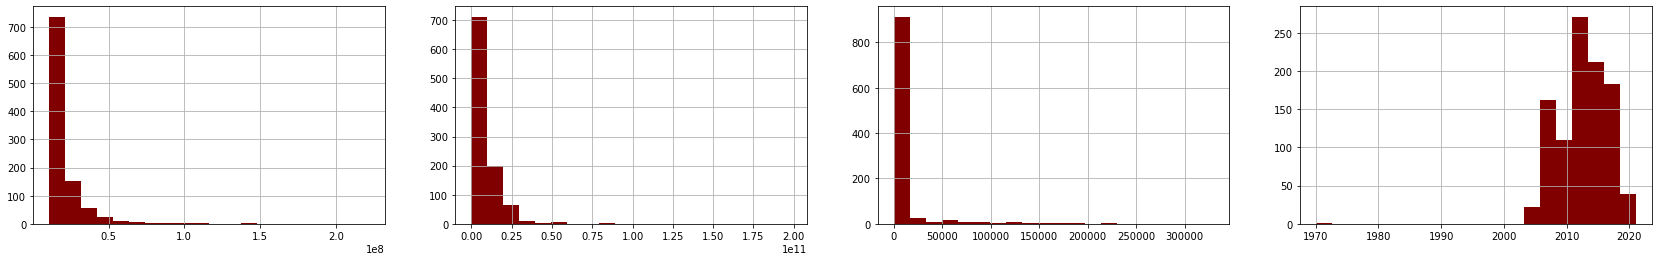

In [ ]:
fig, axes = plt.subplots(ncols= 4, figsize=(29, 4))

youtuberaw['subscribers'].hist(ax= axes[0], bins=20, color='maroon')              # right skewed
youtuberaw['total video views'].hist(ax= axes[1], bins=20, color='maroon')        # right skewed
youtuberaw['total videos'].hist(ax= axes[2], bins=20, color='maroon')             # right skewed
youtuberaw['started'].hist(ax= axes[3], bins=20, color='maroon')                  # left skewed

Melihat outliers secara visual.

<AxesSubplot:title={'center':'Started Distribution'}>

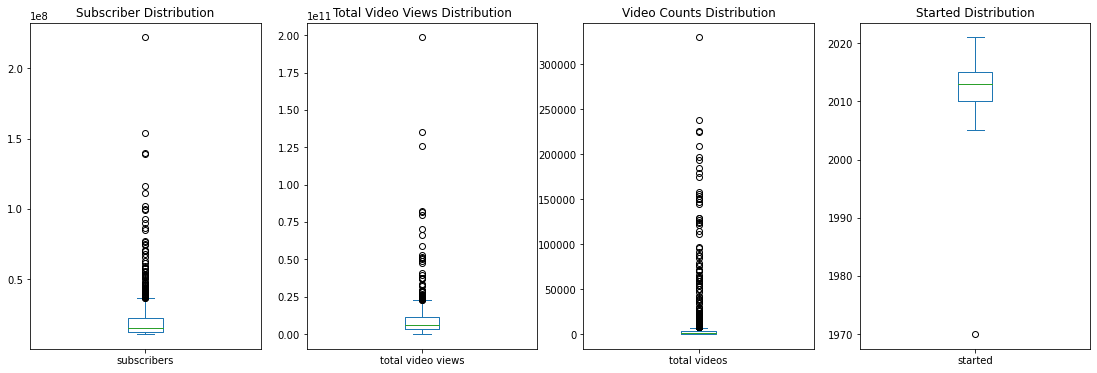

In [ ]:
fig, axes = plt.subplots(ncols= 4, figsize=(19, 6))

youtuberaw['subscribers'].plot(ax = axes[0], kind='box', title='Subscriber Distribution')
youtuberaw['total video views'].plot(ax = axes[1], kind='box', title='Total Video Views Distribution')
youtuberaw['total videos'].plot(ax = axes[2], kind='box', title='Video Counts Distribution')
youtuberaw['started'].plot(ax = axes[3], kind='box', title='Started Distribution')

Menghapus outlier 1970 pada kolom started karena youtube baru didirikan tahun 2015. 

In [ ]:
youtuberaw= youtuberaw.drop(youtuberaw[youtuberaw['started']==1970].index)

Karena menginginkan keakuratan data. Saya tidak akan mengganti outliers di kolom subscribers, total video views, dan video counts distribution melainkan menghapusnya.

In [ ]:
youtuberaw= youtuberaw.drop(youtuberaw[youtuberaw['subscribers']==0].index)

In [ ]:
youtuberaw= youtuberaw.drop(youtuberaw[youtuberaw['total video views']==0].index)

In [ ]:
youtuberaw= youtuberaw.drop(youtuberaw[youtuberaw['total videos']==0].index)

In [ ]:
youtuberaw.head()

,rank,Youtuber,subscribers,total video views,total videos,category,started
0,1,T-Series,222000000,198459090822,17317,Music,2006
2,3,Cocomelon - Nursery Rhymes,140000000,135481339848,786,Education,2006
3,4,SET India,139000000,125764252686,91271,Shows,2006
5,6,PewDiePie,111000000,28469458228,4497,Gaming,2010
6,7,MrBeast,102000000,16832456681,726,Entertainment,2012


Outliers lain di kolom subscribers, total video views, dan video counts tidak diubah karena masih masuk di akal.

Mengurutkan dari jumlah total video views terbanyak.

In [ ]:
youtuberaw= youtuberaw.sort_values(by='total video views', ascending = False)

Mengubah kolom rank.

In [ ]:
youtuberaw= youtuberaw.drop(['rank'], axis='columns').reset_index(drop=True)

In [ ]:
youtuberaw

,Youtuber,subscribers,total video views,total videos,category,started
0,T-Series,222000000,198459090822,17317,Music,2006
1,Cocomelon - Nursery Rhymes,140000000,135481339848,786,Education,2006
2,SET India,139000000,125764252686,91271,Shows,2006
3,Sony SAB,70600000,82473581441,56295,Shows,2007
4,Like Nastya,99200000,81963845811,702,People & Blogs,2016
...,...,...,...,...,...,...
984,FrontaL Gaming,11700000,255073454,108,Gaming,2015
985,NOBRU,13700000,225191097,344,Gaming,2016
986,Calon Sarjana,13000000,10664585,29,Entertainment,2016
987,YtCrash,11400000,3825084,1,Education,2015


Menambahkan kolom years.

In [ ]:
youtuberaw['today'] = 2022
youtuberaw['years'] = youtuberaw['today'] - youtuberaw['started']

In [ ]:
youtuberaw

,Youtuber,subscribers,total video views,total videos,category,started,today,years
0,T-Series,222000000,198459090822,17317,Music,2006,2022,16
1,Cocomelon - Nursery Rhymes,140000000,135481339848,786,Education,2006,2022,16
2,SET India,139000000,125764252686,91271,Shows,2006,2022,16
3,Sony SAB,70600000,82473581441,56295,Shows,2007,2022,15
4,Like Nastya,99200000,81963845811,702,People & Blogs,2016,2022,6
...,...,...,...,...,...,...,...,...
984,FrontaL Gaming,11700000,255073454,108,Gaming,2015,2022,7
985,NOBRU,13700000,225191097,344,Gaming,2016,2022,6
986,Calon Sarjana,13000000,10664585,29,Entertainment,2016,2022,6
987,YtCrash,11400000,3825084,1,Education,2015,2022,7


Membuat dataframe baru dari data yang telah dibersihkan.

In [ ]:
youtube = youtuberaw[['Youtuber', 'subscribers', 'total video views', 'total videos', 'category', 'years']]

In [ ]:
youtube.to_csv('youtube.csv', index=False)

In [ ]:
# google colab
# files.download('youtube.csv')

In [ ]:
youtube10 = youtube.head(10)

In [ ]:
youtube10.to_csv('youtube10.csv', index=False)

In [ ]:
# google colab
# files.download('youtube10.csv')

## III. Analisis

### Loading Dataset Baru

In [ ]:
youtube = pd.read_csv('youtube.csv')

In [ ]:
youtube10 = pd.read_csv('youtube10.csv')

### 1. Siapa youtuber dengan most viewed video terbanyak di youtube?

In [ ]:
total_video_views = youtube[['Youtuber','total video views']].groupby('Youtuber').sum().sort_values(by='total video views', ascending=False).head(10)
total_video_views

,total video views
Youtuber,
T-Series,198459090822
Cocomelon - Nursery Rhymes,135481339848
SET India,125764252686
Sony SAB,82473581441
Like Nastya,81963845811
✿ Kids Diana Show,79602288245
WWE,70544743313
Vlad and Niki,66498762660
Movieclips,58839819120


<AxesSubplot:xlabel='Youtuber'>

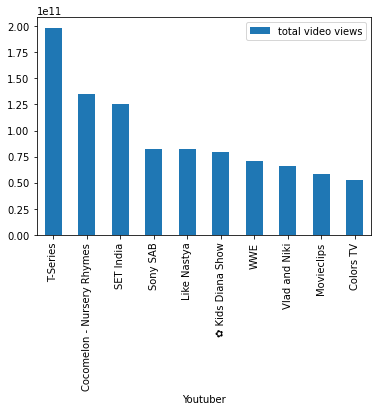

In [ ]:
total_video_views.plot(kind='bar')

Youtuber dengan most viewed video terbanyak adalah T-Series, Diikuti dengan Cocomelon - Nursery Rhymes, SET India, Sony SAB, Like Nastya, ✿ Kids Diana Show, WWE, Vlad and Niki, Movieclips, Colors TV

### 2. Bagaimana hubungan antara jumlah subscribe channel dengan most viewed video di youtube?

In [ ]:
subscribers = youtube[['Youtuber', 'total video views', 'subscribers']].groupby('Youtuber', sort=False).sum().head(10)
subscribers

,total video views,subscribers
Youtuber,,
T-Series,198459090822,222000000
Cocomelon - Nursery Rhymes,135481339848,140000000
SET India,125764252686,139000000
Sony SAB,82473581441,70600000
Like Nastya,81963845811,99200000
✿ Kids Diana Show,79602288245,99700000
WWE,70544743313,90200000
Vlad and Niki,66498762660,85100000
Movieclips,58839819120,57600000


c:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 10047 (\N{BLACK FLORETTE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


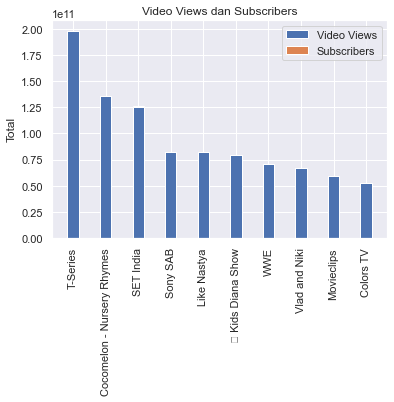

In [ ]:
fig, ax = plt.subplots()

ax.bar(subscribers.index, subscribers['total video views'], width=0.35, label='Video Views')
ax.bar(subscribers.index, subscribers['subscribers'], width=0.35, bottom=subscribers['total video views'],
       label='Subscribers')

ax.set_ylabel('Total')
ax.set_title('Video Views dan Subscribers')
ax.legend()

plt.xticks(rotation=90)

plt.show()

Text(0, 0.5, 'Video Viewers')

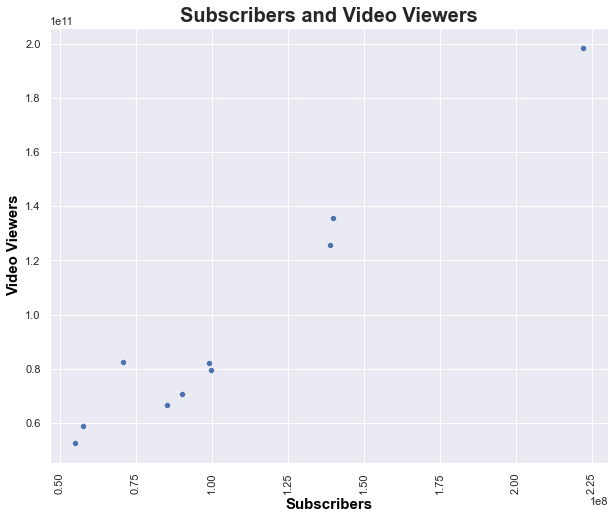

In [ ]:
plt.figure(figsize = (10,8))
sns.scatterplot(data=subscribers, x = 'subscribers', y ='total video views')

plt.title("Subscribers and Video Viewers", weight="bold", fontsize=20)

plt.xlabel("Subscribers", weight="bold",  fontsize=15, color="black")
plt.xticks(rotation=90)

plt.ylabel( "Video Viewers", weight="bold", color="black", fontsize=15)

Berdasarkan plot yang ada jumlah subscribe channel dengan most viewed video di youtube cukup memiliki hubungan. Secara umum semakin banyak subscriber semakin besar total most viewed video. Demikian semakin sedikit subscriber semakin sedikit total most viewed video.

### 3. Bagaimana hubungan antara kategori video dengan most viewed video di youtube?

In [ ]:
categories = youtube[['category', 'total video views']].groupby('category').sum().sort_values('total video views', ascending= False)

categories

,total video views
category,
Music,2906210355935
Entertainment,2065614675162
People & Blogs,902223827281
Gaming,666609775197
Education,597612585217
Film & Animation,492007180389
Shows,383341349652
Comedy,329552696633
News & Politics,238225247927


Text(0, 0.5, 'Video Viewers')

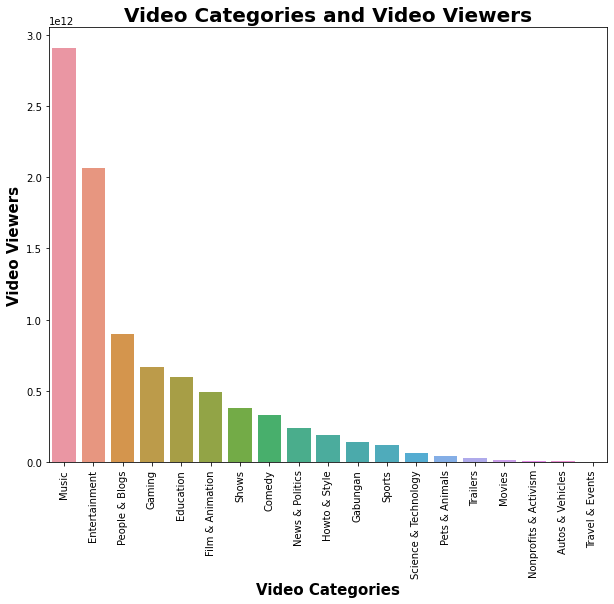

In [ ]:
plt.figure(figsize = (10,8))
sns.barplot(data = categories, x = categories.index, y = 'total video views')


plt.title("Video Categories and Video Viewers", weight="bold", fontsize=20)

plt.xlabel("Video Categories", weight="bold",  fontsize=15, color="black")
plt.xticks(rotation=90)

plt.ylabel( "Video Viewers", weight="bold", color="black", fontsize=15)

Berdasarkan plot yang ada kategori video dengan most viewed video di youtube memiliki hubungan. Most viewed paling tinggi di kategori video Musik, dan disusul oleh Entertainment, People & Blogs,, Gaming, dan Education. Grafik memperlihat kan titik-titik seperti garis miring berdasarkan kategori.

Text(0, 0.5, 'Video Viewers')

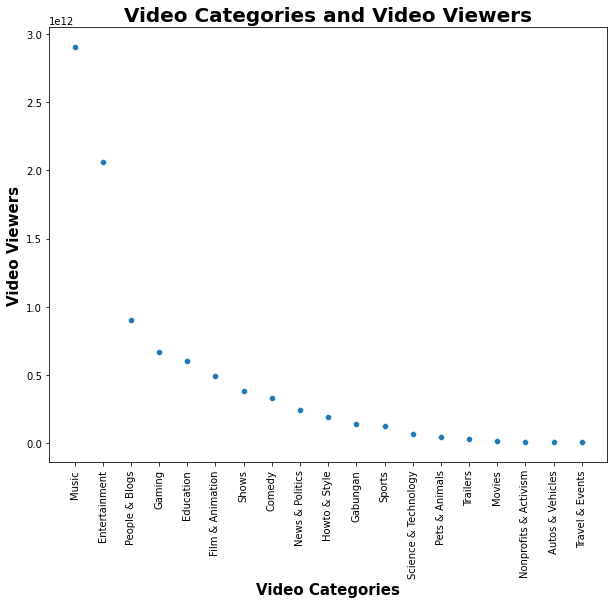

In [ ]:
plt.figure(figsize = (10,8))
sns.scatterplot(data = categories, x = categories.index, y = 'total video views')


plt.title("Video Categories and Video Viewers", weight="bold", fontsize=20)

plt.xlabel("Video Categories", weight="bold",  fontsize=15, color="black")
plt.xticks(rotation=90)

plt.ylabel( "Video Viewers", weight="bold", color="black", fontsize=15)

### 4. Bagaimana hubungan antara tahun pembuatan channel dengan most viewed video di youtube?

In [ ]:
years = youtube.groupby('years')['total video views'].sum().sort_index().to_frame()
years

,total video views
years,
1,34209903420
2,77957327194
3,165235554027
4,389648904226
5,313845330612
6,626524014430
7,695750012153
8,1005996703092
9,668102084046


Text(0, 0.5, 'Video Viewers')

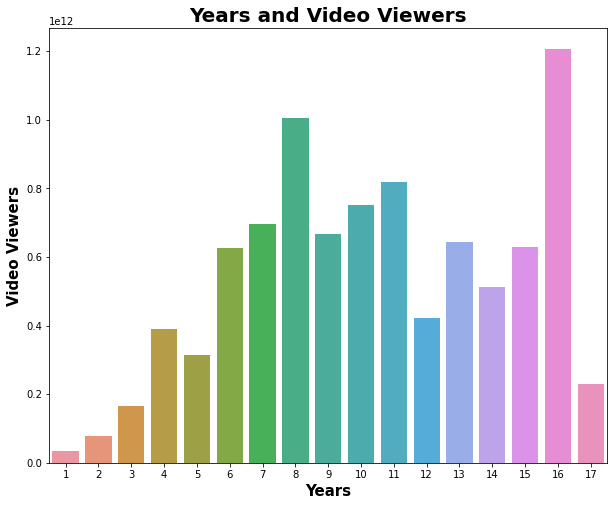

In [ ]:
plt.figure(figsize = (10,8))
sns.barplot(data = years, x = years.index, y = 'total video views')


plt.title("Years and Video Viewers", weight="bold", fontsize=20)

plt.xlabel("Years", weight="bold",  fontsize=15, color="black")

plt.ylabel( "Video Viewers", weight="bold", color="black", fontsize=15)

Text(0, 0.5, 'Video Viewers')

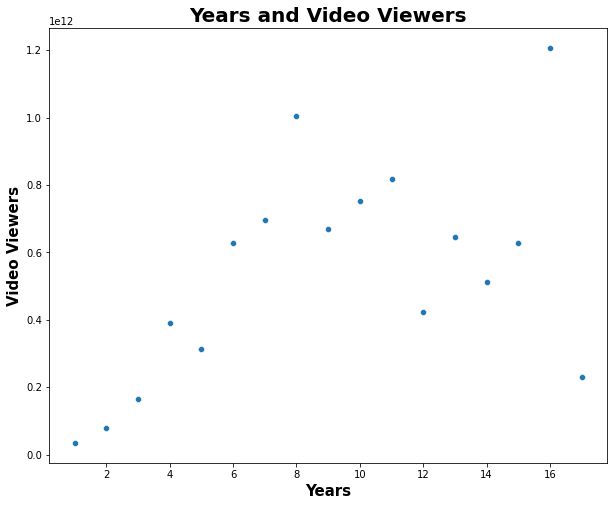

In [ ]:
plt.figure(figsize = (10,8))
sns.scatterplot(data = years, x = years.index, y = 'total video views')


plt.title("Years and Video Viewers", weight="bold", fontsize=20)

plt.xlabel("Years", weight="bold",  fontsize=15, color="black")

plt.ylabel( "Video Viewers", weight="bold", color="black", fontsize=15)

Berdasarkan plot yang ada jangka waktu pembuatan channel dengan most viewed video di youtube cukup memiliki hubungan. Secara umum semakin lama jangka waktu akan semakin besar total most viewed video. Demikian semakin sedikit subscriber semakin sedikit total most viewed video. Grafik memperlihat kan titik-titik membentuk garis miring ke kanan atas.

### 5. Bagaimana hubungan antara total upload video dengan most viewed video di youtube?

In [ ]:
video_uploads = youtube.groupby('total videos')['total video views'].sum().sort_index().to_frame()
video_uploads

,total video views
total videos,
1,4264182
7,12588288710
12,1092248349
13,18826154709
14,17209993079
...,...
209097,11995915981
224455,10421462788
225232,9025460804


Text(0, 0.5, 'Video Viewers')

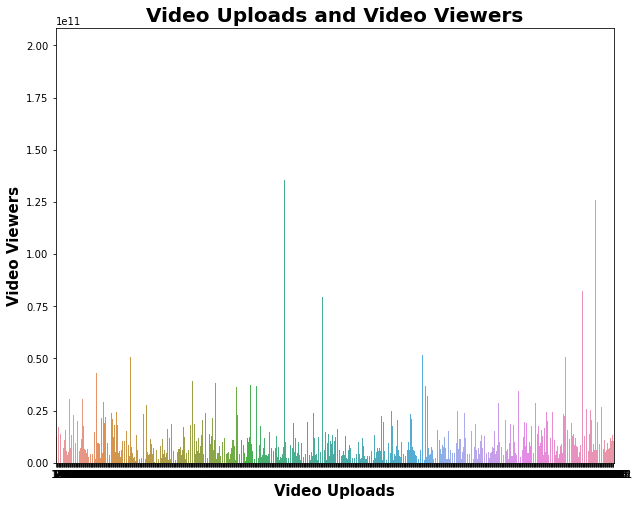

In [ ]:
plt.figure(figsize = (10,8))
sns.barplot(data = video_uploads, x = video_uploads.index, y = 'total video views')


plt.title("Video Uploads and Video Viewers", weight="bold", fontsize=20)

plt.xlabel("Video Uploads", weight="bold",  fontsize=15, color="black")

plt.ylabel( "Video Viewers", weight="bold", color="black", fontsize=15)

Text(0, 0.5, 'Video Viewers')

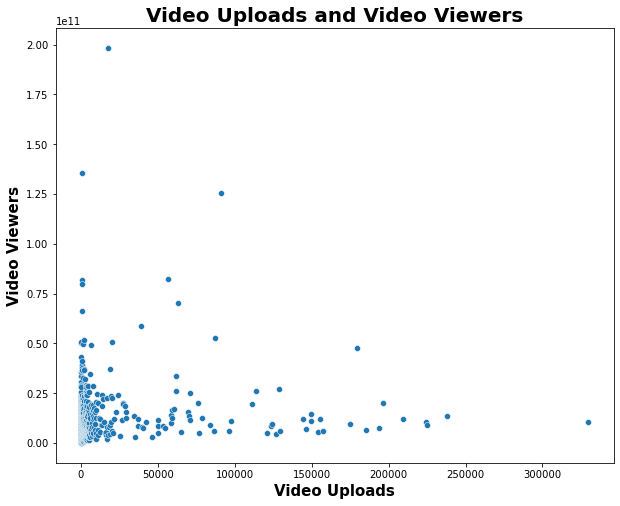

In [ ]:
plt.figure(figsize = (10,8))
sns.scatterplot(data = video_uploads, x = video_uploads.index, y = 'total video views')


plt.title("Video Uploads and Video Viewers", weight="bold", fontsize=20)

plt.xlabel("Video Uploads", weight="bold",  fontsize=15, color="black")

plt.ylabel( "Video Viewers", weight="bold", color="black", fontsize=15)

Plot tidak menunjukkan adanya hubungan antara total upload video dengan most viewed video di youtube. Titik-titik pada garis tersebar.

### 6. Statistika Deskriptif di Youtube

- Melihat gambaran dari data dari Subscriber tertinggi, tengah (Median), dan terendah di Youtube

#### 1. Subscriber dengan jumlah Terendah

In [ ]:
youtube['subscribers'].min()

10900000

In [ ]:
youtube[youtube['subscribers']==10900000].index

Int64Index([284, 377, 457, 547, 634, 701, 788, 794, 813], dtype='int64')

In [ ]:
subs_min = youtube.iloc[[980, 981, 982, 983, 984, 985, 986, 987, 988]]
subs_min

,Youtuber,subscribers,total video views,total videos,category,years
980,Matheus Yurley,13100000,741066278,238,Entertainment,7
981,YOLO,13400000,638326662,117,Comedy,7
982,Dani Russo Tv,11700000,602060711,280,Comedy,8
983,Vevo,20000000,546905035,1519,Music,16
984,FrontaL Gaming,11700000,255073454,108,Gaming,7
985,NOBRU,13700000,225191097,344,Gaming,6
986,Calon Sarjana,13000000,10664585,29,Entertainment,6
987,YtCrash,11400000,3825084,1,Education,7
988,НТВ,14900000,439098,1,People & Blogs,14


#### 2. Subscriber Tengah

In [ ]:
youtube['subscribers'].median()

15500000.0

In [ ]:
youtube[youtube['subscribers']==15500000].index

Int64Index([444, 512, 559, 959], dtype='int64')

#### 3. Subscriber Tertinggi

In [ ]:
youtube['subscribers'].max()

222000000

In [ ]:
youtube[youtube['subscribers']==222000000].index

Int64Index([0], dtype='int64')

In [ ]:
subs_max = youtube.iloc[[0]]
subs_max

,Youtuber,subscribers,total video views,total videos,category,years
0,T-Series,222000000,198459090822,17317,Music,16


- Outlier sudah dibersihkan di bagaian data cleaning.

### 7. Statistika Inferensia di Youtube

In [ ]:
youtube_chi = youtube.copy()

In [ ]:
print(youtube_chi['total video views'].min())
print(youtube_chi['total video views'].max())

439098
198459090822


In [ ]:
tvv = []

for i in youtube_chi['total video views']:
  if i < 20000000000:
    tvv.append(1)
  elif i >= 20000000000 and i < 40000000000:
    tvv.append(2)
  elif i >= 40000000000 and i < 60000000000:
    tvv.append(3)
  elif i >= 60000000000 and i < 80000000000:
    tvv.append(4)
  elif i >= 80000000000 and i < 100000000000:
    tvv.append(5)
  elif i >= 100000000000 and i < 120000000000:
    tvv.append(6)
  elif i >= 120000000000 and i < 140000000000:
    tvv.append(7)
  elif i >= 140000000000 and i < 160000000000:
    tvv.append(8)
  elif i >= 160000000000 and i < 180000000000:
    tvv.append(9)
  elif i >= 180000000000 and i < 200000000000:
    tvv.append(10)
  elif i >= 20000000000 and i < 220000000000:
    tvv.append(11)

youtube_chi['total video views'] = tvv

youtube_chi['total video views']

0      10
1       7
2       7
3       5
4       5
       ..
984     1
985     1
986     1
987     1
988     1
Name: total video views, Length: 989, dtype: int64

a. Memastikan hubungan antara jumlah subscribe channel dengan most viewed video

In [ ]:
chi1 = youtube_chi[['subscribers','total video views']]

contingency_table1=pd.crosstab(chi1['subscribers'],chi1['total video views'])

contingency_table1

total video views,1,2,3,4,5,7,10
subscribers,,,,,,,
10900000,9,0,0,0,0,0,0
11000000,13,0,0,0,0,0,0
11100000,21,0,0,0,0,0,0
11200000,17,0,0,0,0,0,0
11300000,18,0,0,0,0,0,0
...,...,...,...,...,...,...,...
102000000,1,0,0,0,0,0,0
111000000,0,1,0,0,0,0,0
139000000,0,0,0,0,0,1,0


In [ ]:
stat, p, dof, expected = stats.chi2_contingency(contingency_table1)
print('p = %.3f' % (p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

p = 0.000
Probably dependent


Berdasarkan chi_square, subscribe channel memiliki kaitan dengan total viewed per video.

b. Memastikan hubungan antara kategori video dengan most viewed video di youtube?

In [ ]:
chi2 = youtube_chi[['category','total video views']]

contingency_table2=pd.crosstab(chi2['category'],chi2['total video views'])

contingency_table2

total video views,1,2,3,4,5,7,10
category,,,,,,,
Autos & Vehicles,1,0,0,0,0,0,0
Comedy,62,1,0,0,0,0,0
Education,38,7,0,0,0,1,0
Entertainment,225,13,2,1,0,0,0
Film & Animation,44,5,1,0,0,0,0
Gabungan,18,1,0,0,0,0,0
Gaming,99,3,0,0,0,0,0
Howto & Style,44,1,0,0,0,0,0
Movies,2,0,0,0,0,0,0


In [ ]:
stat, p, dof, expected = stats.chi2_contingency(contingency_table2)
print('p = %.3f' % (p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

p = 0.000
Probably dependent


Berdasarkan chi_square, category video memiliki kaitan dengan total viewed per video.

c. Memastikan hubungan antara tahun pembuatan channel dengan most viewed video di youtube?

In [ ]:
chi3 = youtube_chi[['years','total video views']]

contingency_table3=pd.crosstab(chi3['years'],chi3['total video views'])

contingency_table3

total video views,1,2,3,4,5,7,10
years,,,,,,,
1,4,0,0,0,0,0,0
2,10,0,0,0,0,0,0
3,24,1,0,0,0,0,0
4,45,0,0,1,0,0,0
5,59,1,0,0,0,0,0
6,69,6,1,0,1,0,0
7,87,2,1,1,0,0,0
8,109,8,2,0,0,0,0
9,80,7,0,0,0,0,0


In [ ]:
stat, p, dof, expected = stats.chi2_contingency(contingency_table3)
print('p = %.3f' % (p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

p = 0.182
Probably independent


Berdasarkan chi_square, tahun dibuatnya channel youtube tidak mempengaruhi total viewed per video.

d. Memastikan hubungan antara total upload video dengan most viewed video di youtube? 

In [ ]:
chi4 = youtube_chi[['total videos','total video views']]

contingency_table4=pd.crosstab(chi4['total videos'],chi4['total video views'])

contingency_table4

total video views,1,2,3,4,5,7,10
total videos,,,,,,,
1,2,0,0,0,0,0,0
7,1,0,0,0,0,0,0
12,1,0,0,0,0,0,0
13,3,0,0,0,0,0,0
14,2,0,0,0,0,0,0
...,...,...,...,...,...,...,...
209097,1,0,0,0,0,0,0
224455,1,0,0,0,0,0,0
225232,1,0,0,0,0,0,0


In [ ]:
stat, p, dof, expected = stats.chi2_contingency(contingency_table4)
print('p = %.3f' % (p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

p = 0.000
Probably dependent


Berdasarkan chi_square, total upload video dan most viewed video memiliki kedekatan.

### IV. Kesimpulan

Tingkat popularitas sebuah channel di youtube dapat dilihat berdasarkan total video viewsnya. Channel dengan video views yang tinggi akan menarik penonton rutin ke channel tersebut.

Manusia memiliki banyak aspek sehingga sulit menentukan kesukaannya. Berdasarkan data yang ada walaupun tidak absolut, kategori video, lama pembuatan channel, dan konsistensi dalam mengupload memiliki kedekatan dengan jumlah total view video.

Lima kategori yang cukup digemari masyarakat adalah music, entertainment, people & blogs, gaming, education.

Oleh karena itu kami menyarankan kepada tuan Iskandar, untuk mengombinasikan topik politik dengan kelima kategori yang telah disebutkan, jeli melihat minat penonton, sabar dalam mengembangkan channel dan konsisten dalam mengupload video.